<a href="https://colab.research.google.com/github/juasalazarmo/Practicas/blob/main/Parcial_1_Se%C3%B1ales_Sistemas_Juan_Carlos_Salazar_Moreno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PARCIAL 1: SISTEMAS Y SEÑALES 2024-1**

***Juan Carlos Salazar Moreno***


**LITERAL A** <br>
La distancia media entre dos señales periódicas $x_1(t) \in \mathbb{R}, \mathbb{C} \quad \text{y} \quad x_2(t) \in \mathbb{R}, \mathbb{C}$; se puede expresar a partir de la potencia media de la diferencia entre ellas:

$$ d^2 (x_1, x_2) = P_{(x_1-x_2)} = \lim_{T \to \infty} \left(\frac{1}{T} \int_{T} |x_1(t)-x_2(t)|^2 dt \right)$$

Sea $x_1(t)$ y $x_2(t)$ dos señales como se muestra a continuación:

$$x_1(t) = Ae^{j\omega_0 t}$$ <br>
$$x_2(t) = Ae^{j5\omega_0 t}$$ <br>
con $\omega_0 = \frac{2\pi}{T}; \quad T, A, B \in \mathbb{R}^+. $ Determine la distancia entre las dos señales.

Nota: Se desarrolla en el PDF



**LITERAL B** <br>
¿Cuál es la señal obtenida en tiempo discreto alutilizar un conversor análogo digital con frecuencia de muestreo de $5 \text{ kHz}$, aplicado a la señal continua $x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)$?
Realizar la simulación del proceso de discretización. <br>En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

**Desarollo literal B**

Se tiene la siguiente señal continua:

  $$x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)$$<br>


de la anterior se obtiene que:

$$ \omega_1 = 1000\pi = 2\pi \cdot F_1; \quad F_1 = \frac{1000\pi}{2\pi} = 500; \quad T_1 = \frac{1}{500} $$

$$ω_2 = 2000\pi = 2\pi \cdot F_2; \quad F_2 = \frac{2000\pi}{2\pi} = 1000; \quad T_2 = \frac{1}{1000} $$

$$ ω_3 = 11000\pi = 2\pi \cdot F_3; \quad F_3 = \frac{11000\pi}{2\pi} = 5500; \quad T_3 = \frac{1}{5500} $$



<br><br>


Se procede a discretizar las señales teniendo en cuenta que:
$$  t = nT_s = \frac{n}{F_s} $$

Señal $x_1$ discretizada:
$$ x_1[n] = 3\cos\left(1000\pi \cdot \frac{n}{5000}\right) $$
$$ x_1[n] = 3\cos\left(\frac{\pi}{5} \cdot n\right) $$
$$\Omega_1 = \frac{5}{\pi} = 0.62 $$
Lo anteriornos indica que la señal $x_1$ no es un aliasing ya que se encuentra entre $-\pi $ y $π$.<br><br>




Señal $x_2$ discretizada:

$$ x_2[n] = 5sen\left(2000\pi \cdot \frac{n}{5000}\right) $$
$$ x_2[n] = 5sen\left(\frac{2\pi}{5} \cdot n\right) $$
$$Ω_2 = \frac{2π}{5} = 1.2 $$
Lo anteriornos indica que la señal $x_2$ no es un aliasing ya que se encuentra entre $-\pi $ y $π$.
<br><br>

Señal $x_3$ discretizada:
$$ x_3[n] = 10\cos\left(11000\pi \cdot \frac{n}{5000}\right) $$
$$ x_3[n] = 10\cos\left(\frac{11\pi}{5} \cdot n\right) $$
$$\Omega_3 = \frac{11π}{5} = 6.9 $$
Lo anterior nos indica que la señal $x_3$ es un aliasing ya no que se encuentra entre $-\pi $ y $π$.<br>
<br>


De esta forma, discretizando la señal dada con un conversor análogo digital con una frecuencia de muestreo de $5 \text{ kHz}$, se obtiene la siguiente señal discretizada:


$$\fbox{$x[n] = 3\cos\left(\frac{\pi}{5} \cdot n\right) + 5\sin\left(\frac{2\pi}{5} \cdot n\right) + 10\cos\left(\frac{\pi}{5} \cdot n\right)$}
$$<br>
Al realizar el procedimiento anterior, nos damos cuenta de que hay señales con la misma frecuencia, lo que indica que el conversor no es adecuado. Por lo tanto, decidimos utilizar el teorema de Nyquist para calcular la nueva frecuencia de muestreo $ F_s $.

$$F_s \geq 2F_{\text{MAX}}$$

La frecuencia angular máxima de la señal $x(t)$ es $ω_3=11000π$.

$F = 5500$
$$F_s \geq 2F_{\text{MAX}}$$
$$F_s \geq 2 \times 5500 $$<br>
La nueva frecuencia de muestreo mínima $F_s$ será $11000$.

La señal discretizada será entonces:

$$x[n] = 3\cos\left(\frac{1000\pi}{11000} \cdot n\right) + 5\sin\left(\frac{2000\pi}{11000} \cdot n\right) + 10\cos\left(\frac{11000\pi}{11000} \cdot n\right) $$
<br>
$$\boxed{x[n] = 3\cos\left(\frac{\pi}{11} \cdot n\right) + 5\sin\left(\frac{2\pi}{11} \cdot n\right) + 10\cos(\pi \cdot n)} $$

**Suimulación literal B**


<ipython-input-19-d13ccc1a9c1a>:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_discrete, x_discrete, label='Señal discretizada', use_line_collection=True)


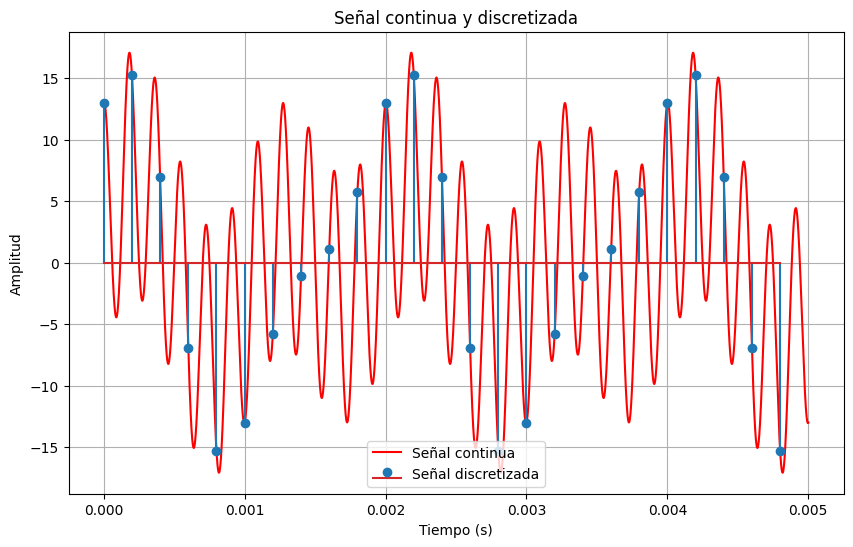

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua
def signal(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Definir el intervalo de tiempo para la señal continua
t_continuous = np.linspace(0, 0.005, 10000)  # De 0 a 0.005 segundos con 10000 puntos (para una frecuencia de 100 Hz)

# Muestrear la señal continua a una frecuencia de muestreo de 5 kHz
fs = 5000  # Frecuencia de muestreo de 5 kHz
t_discrete = np.arange(0, 0.005, 1/fs)  # Generar puntos de tiempo discretos

# Obtener los valores discretos de la señal
x_discrete = signal(t_discrete)

# Graficar la señal continua y la señal discretizada
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, signal(t_continuous), label='Señal continua', c="r")
plt.stem(t_discrete, x_discrete, label='Señal discretizada', use_line_collection=True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua y discretizada')
plt.legend()
plt.grid(True)
plt.show()


<br>**LITERAL C** <br>
Implemente una simulación para encontrar la salida del sistem lineal e invriante al tiempo H{.}, con respuesta al escalón $h_∈[n] = [2,4,1,5,0,10],$ $n ∈ 𝕫$, ante la entrad análoga de corriente $x(t) = 20(\cos(\frac{t}{3}) + \cos(\frac{t}{4}))$ $[A]$. $A$: Amperios. Incluya los acondicionamientos necesarios de discretización y cuantización, asumiendo un microprocesador de 4 bits con entrada análoga de $4mA$ a $20 mA$.


**Desarrollo literal C**<br><br>
Nos dan una señal análoga, así que debemos digitalizarla.

Del enunciado tenemos que:
$$\omega_1 = \frac{1}{3}$$  
$$\omega_2 = \frac{1}{4}\$$

se deben tener en cuenta las siguiente expresiones:

$$ \omega = 2\pi \cdot F \$$

$$\ F = \frac{\omega}{2\pi} \$$

$$ T = \frac{1}{F} \$$

Al reemplazar los valores, obtenemos $T_1$ y $T_2$:

$$ T_1 = 6\pi \$$

$$ T_2 = 8\pi \$$


No tenemos el periodo total de la señal, así que aplicamos el  $MCM$ a los peridos $T_1$ y $T_2$: <br><br>

$$\text{MCM}(6\pi, 8\pi) = 2^{2} \times 3 = 24π[s]$$ <br>

Una vez tenemos el periodo total $T$, debemos digitalizar y cuantizar.

**Simulación literal C**<br><br>
**Discretización y cuantización de la señal analógica $x(t) = 20(\cos(\frac{t}{3}) + \cos(\frac{t}{4}))$**

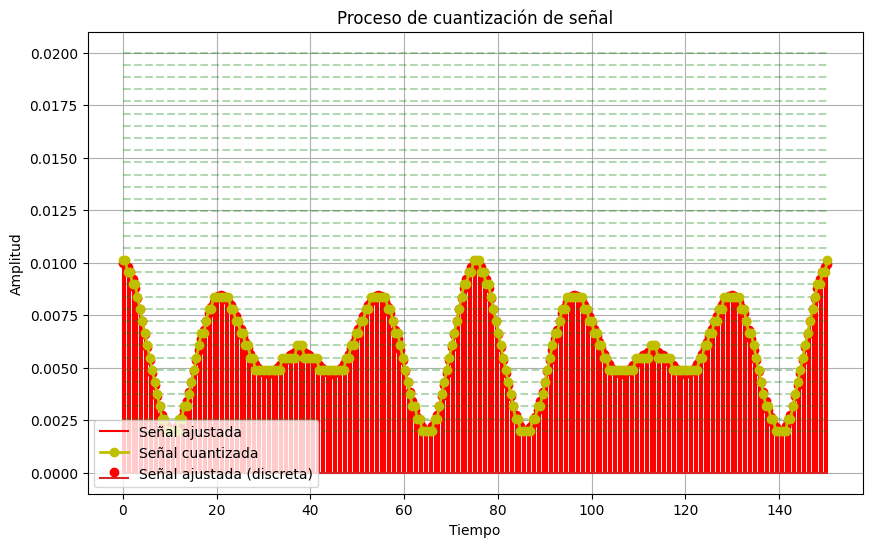

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Función para calcular una línea recta de ajuste
def calcular_recta_ajuste(x, ymin=0.004, ymax=0.02):
    # Calcula los valores máximos y mínimos de x
    xmax = max(x)
    xmin = min(x)
    # Calcula la pendiente y la constante de la línea recta
    pendiente = (ymax - ymin) / (xmax - xmin)
    c = ymin - pendiente * xmin
    # Calcula la señal ajustada
    y_ajustada = pendiente * x + c
    return y_ajustada

# Señal original x(t)
F1 = 1 / (2 * (np.pi))
F2 = 1 / (8 * (np.pi))
T = 24 * (np.pi)
A1 = A2 = 20
Fs = 12 * max(F1, F2)
Ts = 1 / Fs
tv = np.arange(0, 2 * T, Ts)
y1 = A1 * np.cos((1 / 3) * tv)
y2 = A2 * np.cos((1 / 4) * tv)

y_original = y1 + y2

# Ajuste de cero y pendiente
ycs_ajustada = calcular_recta_ajuste(y_original, ymin=0.002, ymax=0.01)

# Parámetros de cuantización
num_bits = 5
rmin = 0.002
rmax = 0.02
ve = np.linspace(rmin, rmax, 2**num_bits)

# Distancias entre puntos ajustados y estados de cuantización
distancias = cdist(ycs_ajustada.reshape(-1, 1), ve.reshape(-1, 1))
indices_cuantizacion = np.argmin(distancias, axis=1)

# Función de cuantización punto a punto
def cuantizar_punto_a_punto(yn, vector_cuantizacion):
    # Calcula la distancia entre yn y los puntos del vector de cuantización
    distancias_punto = cdist(yn.reshape(-1, 1), vector_cuantizacion.reshape(-1, 1))
    # Obtiene el índice del estado más cercano
    indice_minimo = np.argmin(distancias_punto)
    return vector_cuantizacion[indice_minimo]

# Cuantización de la señal
for i in range(ycs_ajustada.shape[0]):
    if i == 0:
        y_cuantizada = cuantizar_punto_a_punto(ycs_ajustada[i], ve)
    else:
        y_cuantizada = np.append(y_cuantizada, cuantizar_punto_a_punto(ycs_ajustada[i], ve))

# Gráficas
plt.figure(figsize=(10, 6))

# Señal ajustada (continua)
plt.plot(tv, ycs_ajustada, c='r', label='Señal ajustada')
# Señal ajustada (discreta)
plt.stem(tv, ycs_ajustada, label='Señal ajustada (discreta)', linefmt='r-', markerfmt='ro')

# Estados de cuantización
for v in ve:
    plt.plot(tv, v * np.ones(len(tv)), 'g--', alpha=0.3)

# Señal digital (discreta + cuantizada)
plt.plot(tv, y_cuantizada, c='y', marker='o', label='Señal cuantizada', linewidth=2)

# Ajustes visuales y etiquetas
plt.legend()
plt.grid(True)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Proceso de cuantización de señal')
plt.show()


**Simulación del SLIT**

Respuesta al impulso del SLIT: [ 2 -3  6 -2 -2  6]


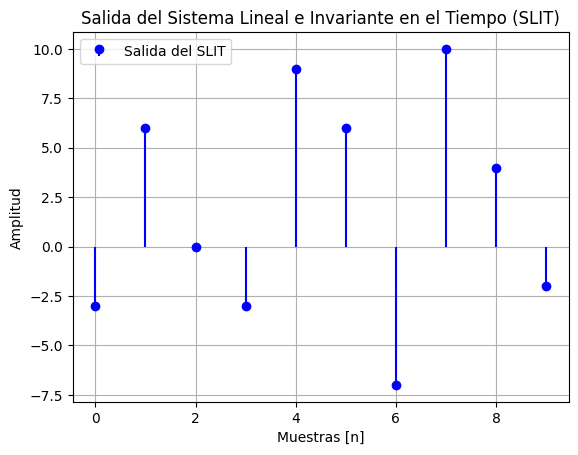

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Respuesta al escalón del SLIT
respuesta_escalon = np.array([3, 5, 2, 8, 6, 4, 10])

# Cálculo de la respuesta al impulso del SLIT
respuesta_impulso = np.diff(respuesta_escalon)
print("Respuesta al impulso del SLIT:", respuesta_impulso)

# Señal de entrada del SLIT (simulada)
entrada_digital = np.array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

# Convolución entre la entrada digital y la respuesta al impulso del SLIT
salida_slit = np.convolve(entrada_digital, respuesta_impulso, mode='same')

# Gráfica de la salida del SLIT
plt.stem(salida_slit, linefmt='b-', markerfmt='bo', basefmt=' ', label='Salida del SLIT')
plt.xlabel('Muestras [n]')
plt.ylabel('Amplitud')
plt.title('Salida del Sistema Lineal e Invariante en el Tiempo (SLIT)')
plt.legend()
plt.grid(True)
plt.show()
